# Subject Conversion data work with `pandas`

This is a notebook to work with our subject reconciliation data and start to analyze it a bit. Maybe clean it in certain ways, too.


In [1]:
import pandas as pd

## Starting off the csv way
(Hey, it's what I know best! We can try to replicate in Excel next)  
After we get pandas set up, let's first see if the data is ready:

In [2]:
!head subject_conversion.csv

Status,old_ARK,old_predicate,new_predicate,predicate match,new_role,old_label,updated_label,current DAMS_Label is correct,Action,ARK action ,Label action ,Note,clustering id,FAST_Label_Match_Updated_DAMS_Label,FAST_Label,FAST_URI,LC_Label_Match_Updated_DAMS_Label,LoC_Label,LoC_URI,AAT_Label_Match,AAT_Label,AAT_URI,VIAF_Label_Match,VIAF_Label,VIAF_URI,MARC_tag,Sample_Object_ARK,Object_Counts,Parts,Part_order,DAMS_ARK_Part_order,sort,source,simple or complex,jj,wikipedia_link,ll,mm
split from complex no match,http://library.ucsd.edu/ark:/20775/bb0001382f,dams:complexSubject,dams:geographic,False,,"Rancho San Regis (Baja California, Mexico)","Rancho San Regis (Baja California, Mexico)",,local,,,,,,,,,,,,,,,,,,http://library.ucsd.edu/dc/object/bb98306314,2,2,1,http://library.ucsd.edu/ark:/20775/bb0001382f-1,2,split from complex,complex,,,,
split from complex matched FAST,http://library.ucsd.edu/ark:/20775/bb0001382f,dams:complexSubject,dams:topic,False,,Pictorial works,Pictorial works,True

Now let's get `pandas` to get this as a dataframe and show us a snippet. We'll use the magic `%timeit` which will tell us how quickly this large-ish (>3MB) csv will become a dataframe

In [3]:
# Specify no low memory check, since that was causing errors
df = pd.read_csv('subject_conversion.csv', low_memory=False)

We can get some general info about the dataframe with the `info` method

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18749 entries, 0 to 18748
Data columns (total 39 columns):
Status                                 16939 non-null object
old_ARK                                16939 non-null object
old_predicate                          16939 non-null object
new_predicate                          16938 non-null object
predicate match                        16938 non-null object
new_role                               945 non-null object
old_label                              16938 non-null object
updated_label                          16938 non-null object
current DAMS_Label is correct          16938 non-null object
Action                                 14204 non-null object
ARK action                             549 non-null object
Label action                           418 non-null object
Note                                   49 non-null object
clustering id                          13098 non-null object
FAST_Label_Match_Updated_DAMS_Label    10829 n

We can get a sense of the row/column breakdown by using the `shape` method

In [5]:
df.shape

(18749, 39)

The number 18,749 is a bit misleading, and must be an instance of blank rows being counted (there's many things that can happen with even the best Excel->csv conversions). From the `.info` method above, we see there's really 16,938 non-null rows

Now let's look at a little snippet at the beginning of the data

In [6]:
df.head()

,Status,old_ARK,old_predicate,new_predicate,predicate match,new_role,old_label,updated_label,current DAMS_Label is correct,Action,...,Parts,Part_order,DAMS_ARK_Part_order,sort,source,simple or complex,jj,wikipedia_link,ll,mm
0,split from complex no match,http://library.ucsd.edu/ark:/20775/bb0001382f,dams:complexSubject,dams:geographic,False,NaN,"Rancho San Regis (Baja California, Mexico)","Rancho San Regis (Baja California, Mexico)",NaN,local,...,2.0,1.0,http://library.ucsd.edu/ark:/20775/bb0001382f-1,2.0,split from complex,complex,NaN,NaN,NaN,NaN
1,split from complex matched FAST,http://library.ucsd.edu/ark:/20775/bb0001382f,dams:complexSubject,dams:topic,False,NaN,Pictorial works,Pictorial works,True,FAST,...,NaN,2.0,http://library.ucsd.edu/ark:/20775/bb0001382f-2,3.0,split from complex,complex,NaN,NaN,NaN,NaN
2,original no match,http://library.ucsd.edu/ark:/20775/bb0001383z,dams:corporateName,dams:corporateName,True,NaN,"University Communications, University of Calif...","University of California, San Diego. Universit...",False,VIAF,...,1.0,0.0,http://library.ucsd.edu/ark:/20775/bb0001383z,5.0,original,simple,NaN,NaN,NaN,NaN
3,split from complex no match,http://library.ucsd.edu/ark:/20775/bb0001384g,dams:complexSubject,dams:geographic,False,NaN,"Pozo Alemán (Baja California, Mexico)","Pozo Alemán (Baja California, Mexico)",True,local,...,2.0,1.0,http://library.ucsd.edu/ark:/20775/bb0001384g-1,8.0,split from complex,complex,NaN,NaN,NaN,NaN
4,split from complex matched FAST,http://library.ucsd.edu/ark:/20775/bb0001384g,dams:complexSubject,dams:topic,False,NaN,Pictorial works,Pictorial works,True,FAST,...,NaN,2.0,http://library.ucsd.edu/ark:/20775/bb0001384g-2,9.0,split from complex,complex,NaN,NaN,NaN,NaN


In [7]:
df['updated_label'].head()

0           Rancho San Regis (Baja California, Mexico)
1                                      Pictorial works
2    University of California, San Diego. Universit...
3                Pozo Alemán (Baja California, Mexico)
4                                      Pictorial works
Name: updated_label, dtype: object

In [8]:
df_deduped = df.drop_duplicates(subset='updated_label', keep='first', inplace=False)

In [9]:
# Original df.info (number of non-null rows) = 16,938
df_deduped.shape

(10018, 39)

# Now it's time for Excel
We'll do basically what we did above, but read the original Excel file and attempt no conversions

In [10]:
dfe = pd.read_excel("combined_subject_conversion_file.xlsx", sheet_name='authorities')

### First goal: 


In [11]:
# import regular expressions library in case we need it
import re

In [12]:
dfe.shape

(9936, 10)

In [13]:
dfe['clustering id'].head

<bound method NDFrame.head of 0                      http://id.worldcat.org/fast/518160
1                          http://viaf.org/viaf/205794409
2                                                     NaN
3                                                     NaN
4                                                     NaN
5                                                     NaN
6                                                     NaN
7                                                     NaN
8                                                     NaN
9                                                     NaN
10                                                    NaN
11                                                    NaN
12                                                    NaN
13                                                    NaN
14                                                    NaN
15                                                    NaN
16                                        

See row 9925? It has a "local" value. Therefore, by defintion we cannot have these local values as an "external URI" column. We'd need to filter out those values. We can find them by using the `.contains` method:

In [14]:
df_local = dfe['clustering id'].str.contains("local", na='NaN')

In [28]:
df_local.head()

0    False
1    False
2      NaN
3      NaN
4      NaN
Name: clustering id, dtype: object

In [16]:
dff = pd.unique(dfe[['clustering id', 'FAST_URI', 'VIAF_URI']].values.ravel())

In [17]:
dff[0:20]

array(['http://id.worldcat.org/fast/518160', nan,
       'http://viaf.org/viaf/205794409',
       'http://id.worldcat.org/fast/1912532',
       'http://id.worldcat.org/fast/1355782',
       'http://id.worldcat.org/fast/1037781',
       'http://id.worldcat.org/fast/1037841',
       'http://viaf.org/viaf/133756274', 'http://viaf.org/viaf/144177198',
       'http://id.loc.gov/authorities/subjects/sh2010014617',
       'http://id.worldcat.org/fast/1883914',
       'http://id.worldcat.org/fast/794142',
       'http://id.worldcat.org/fast/794145',
       'http://id.worldcat.org/fast/794496', 'local-abra-1',
       'http://id.worldcat.org/fast/794929',
       'http://id.worldcat.org/fast/794982',
       'http://id.worldcat.org/fast/794997',
       'http://id.loc.gov/authorities/names/n79145195',
       'http://id.worldcat.org/fast/1207152'], dtype=object)

## Statistics and plotting

Let's do some statistics on the data, and then try some plotting

In [18]:
%matplotlib inline

In [19]:
df['new_predicate'].describe()

count          16938
unique            14
top       dams:topic
freq            6621
Name: new_predicate, dtype: object

In [20]:
subjectTypes = df['new_predicate'].unique()

In [21]:
subjectTypes

array(['dams:geographic', 'dams:topic', 'dams:corporateName',
       'dams:personalName', 'dams:temporal', 'not used',
       'dams:scientificName', 'dams:familyName', nan, 'dams:personalName ',
       'dams:geographic ', 'dams:scientificName ', 'dams:anatomy ',
       'dams:familyName ', 'dams:series '], dtype=object)

In [22]:
bySubj = df.groupby('new_predicate')

In [23]:
bySubj.describe()

MARC_tag                                             \
                        count        mean       std    min    25%    50%   
new_predicate                                                              
dams:anatomy              0.0         NaN       NaN    NaN    NaN    NaN   
dams:corporateName      599.0  110.337229  3.074841  110.0  110.0  110.0   
dams:familyName          10.0  100.000000  0.000000  100.0  100.0  100.0   
dams:familyName           0.0         NaN       NaN    NaN    NaN    NaN   
dams:geographic        3373.0  150.816484  2.728600  110.0  151.0  151.0   
dams:geographic           0.0         NaN       NaN    NaN    NaN    NaN   
dams:personalName       904.0  100.000000  0.000000  100.0  100.0  100.0   
dams:personalName         0.0         NaN       NaN    NaN    NaN    NaN   
dams:scientificName      15.0  150.000000  0.000000  150.0  150.0  150.0   
dams:scientificName       0.0         NaN       NaN    NaN    NaN    NaN   
dams:series               0.0         NaN       NaN    NaN    NaN    NaN   
dams:temporal            61.0  149.967213  0.256074  148.0  150.0  150.0   
dams:topic             5739.0  150.423070  5.626067  100.0  150.0  150.0   
not used                 34.0  148.941176  6.060009  130.0  150.0  151.0   

                                   Object_Counts               ...     mm      \
                        75%    max         count        mean   ...    75% max   
new_predicate                                                  ...              
dams:anatomy            NaN    NaN           5.0    2.400000   ...    NaN NaN   
dams:corporateName    110.0  151.0        1244.0   80.688907   ...    NaN NaN   
dams:familyName       100.0  100.0          21.0    2.285714   ...    NaN NaN   
dams:familyName         NaN    NaN           4.0   40.750000   ...    NaN NaN   
dams:geographic       151.0  151.0        4289.0   25.278153   ...    NaN NaN   
dams:geographic         NaN    NaN         224.0    8.245536   ...    NaN NaN   
dams:personalName     100.0  100.0        3998.0    4.989245   ...    NaN NaN   
dams:personalName       NaN    NaN         234.0    3.683761   ...    NaN NaN   
dams:scientificName   150.0  150.0          15.0    2.933333   ...    NaN NaN   
dams:scientificName     NaN    NaN          21.0    1.666667   ...    NaN NaN   
dams:series             NaN    NaN          23.0    2.782609   ...    NaN NaN   
dams:temporal         150.0  150.0         128.0  103.312500   ...    NaN NaN   
dams:topic            150.0  155.0        6621.0   34.986105   ...    NaN NaN   
not used              151.0  155.0         110.0  173.727273   ...    NaN NaN   

                        sort                                                 \
                       count          mean           std      min       25%   
new_predicate                                                                 
dams:anatomy             5.0  31516.200000    303.205706  31109.0  31326.00   
dams:corporateName    1244.0  18028.440514  10161.304336      5.0   8919.50   
dams:familyName         21.0  15202.809524   8941.908586   3271.0   6775.00   
dams:familyName          4.0  31580.250000    459.871268  31111.0  31224.25   
dams:geographic       4289.0  15471.498718   8940.569747      2.0   7798.00   
dams:geographic        224.0  31569.187500    313.678094  30944.0  31353.50   
dams:personalName     3998.0  15424.757879   8876.582720     17.0   7828.75   
dams:personalName      234.0  31436.777778    302.477470  30928.0  31259.25   
dams:scientificName     15.0  15846.333333  10355.698153   1611.0   4710.00   
dams:scientificName     21.0  31525.285714    275.626766  30983.0  31375.00   
dams:series             23.0  31462.782609    256.246145  31237.0  31242.50   
dams:temporal          128.0  15252.085938   8635.783242    100.0   8487.25   
dams:topic            6621.0  16486.312415   9532.635148      3.0   8139.00   
not used               111.0  15394.702703   8276.751582    269.0   8451.00   

      

In [24]:
bySubj_counts = df.groupby('new_predicate')['updated_label'].count()

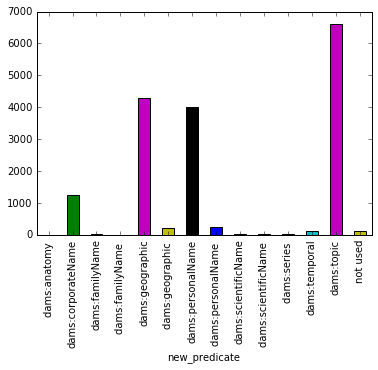

In [27]:
bySubj_counts.plot(kind='bar')

In [25]:
typesCount = df['new_predicate'].count()

In [26]:
typesCount

16938

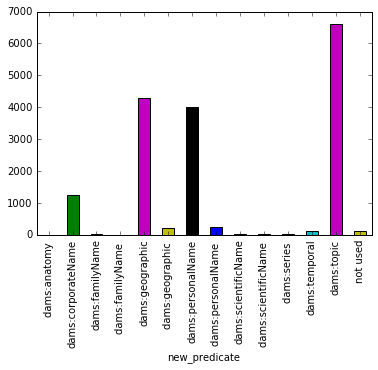